# Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Cleaning and Mapping Yes/No Columns

In [2]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning and Mapping Checkbox Columns

In [3]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [4]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning the Ranking Columns

In [5]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [6]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank 1',
    'Unnamed: 10': 'rank 2',
    'Unnamed: 11': 'rank 3',
    'Unnamed: 12': 'rank 4',
    'Unnamed: 13': 'rank 5',
    'Unnamed: 14': 'rank 6'
})
star_wars.columns[9:15]

Index(['rank 1', 'rank 2', 'rank 3', 'rank 4', 'rank 5', 'rank 6'], dtype='object')

# Finding the Highest-Ranked Movie

In [7]:
ranking_means = star_wars[star_wars.columns[9:15]].mean()

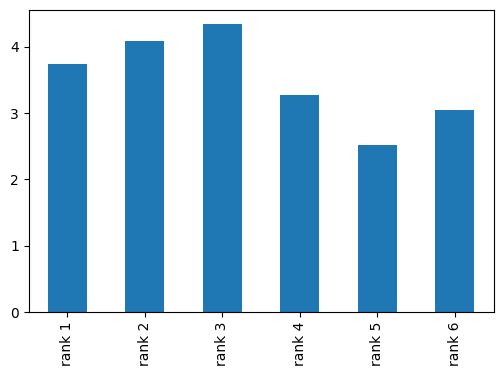

In [8]:
%matplotlib inline
ranking_means.plot.bar()

In the rankings displayed above, it's evident that **Star Wars: Episode V The Empire Strikes Back** received the lowest score, suggesting it was the favorite among a larger audience.

# Finding the Most Viewed Movie

In [9]:
views = star_wars[star_wars.columns[3:9]].sum()

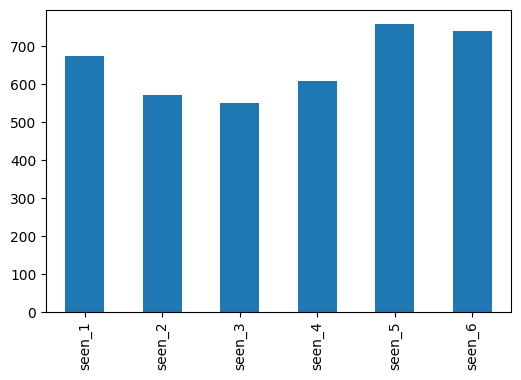

In [10]:
views.plot.bar()

As expected, **Star Wars: Episode V The Empire Strikes Back** is both the most seen movie and the highest ranked. This likely happened because the movie is very popular and many people watched it, leading to it being highly regarded by viewers.

# Exploring the Data by Binary Segments

In [11]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

## Highest Ranked by Fans

In [12]:
fan_ranking_means = fan[fan.columns[9:15]].mean()

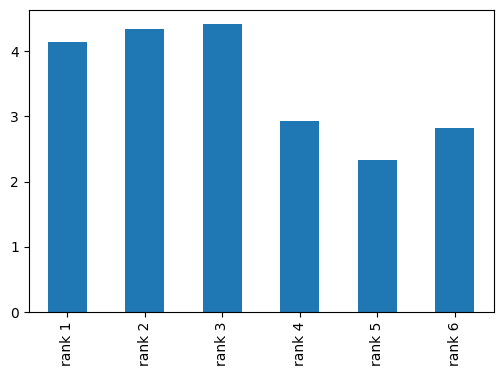

In [13]:
fan_ranking_means.plot.bar()

Here we can see that still the fifth movie of the star wars saga was the favourite to the greatest amount of fans

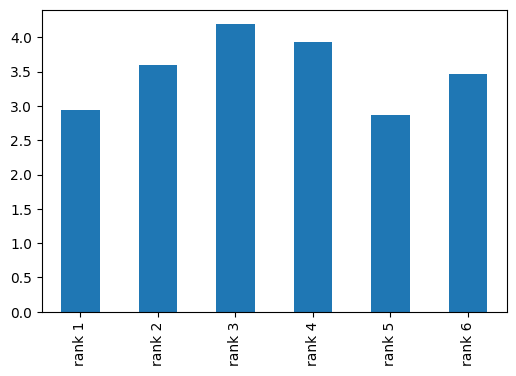

In [14]:
not_fan_ranking_means = not_fan[not_fan.columns[9:15]].mean()
not_fan_ranking_means.plot.bar()

Here, there is a noticeable difference. Non-Star Wars fans selected both the first and fifth movies as their favorites. This could be because, as they are not fans of the saga, they might only watch the first movie. Their preference for these particular films might indicate their limited exposure or interest in the franchise beyond the initial installment.

## Most seen by Fans

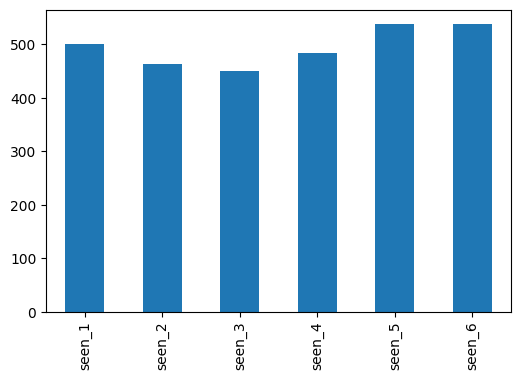

In [15]:
fan_views = fan[fan.columns[3:9]].sum()
fan_views.plot.bar()

Nothing special here. We can see that Star Wars fans tend to watch the first, the fifth and the sixth movie the most, a pattern already seen when analysing the entire dataset.

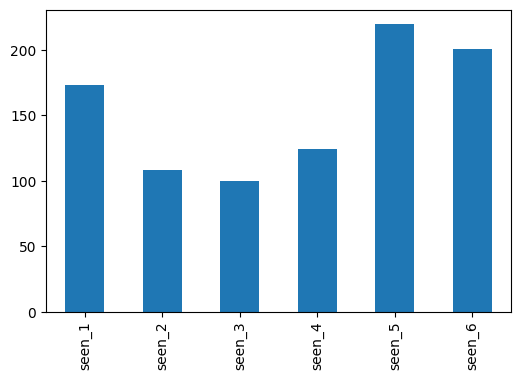

In [16]:
non_fan_views = not_fan[not_fan.columns[3:9]].sum()
non_fan_views.plot.bar()

Here there is an interesting patter. As expected, non-fans wa